In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import confusion_matrix, auc, roc_curve, f1_score, roc_auc_score, cohen_kappa_score
 
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from os import path

pd.set_option('display.max_columns', None) # for displaying all columns
np.random.seed(0) # for reproducibility

## Exploratory data analysis
#### First view

In [2]:
data = pd.read_csv("../input/WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

Plot histogram for our target value **Attrtion**

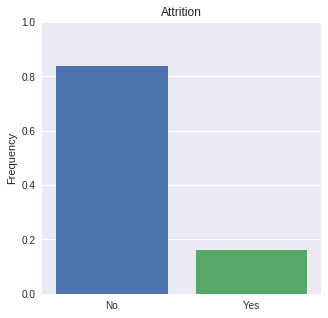

In [5]:
fig = plt.figure(figsize=(5, 5))
y = ["No", "Yes"]
ax = sns.categorical.barplot(y, np.array(data.Attrition.value_counts(normalize=True)), saturation=1)
ax.set_xticklabels(y)
ax.set_title("Attrition")
ax.set_xlabel("")
ax.set_ylabel("Frequency")
ax.set_ylim([0,1])
plt.show()

This histogram says that we have an unbalanced data. Therefore, in this case, our model we can not use ** accuracy **, becouse this metric will give very good results, even if our model will generate all the time ** "No" **.

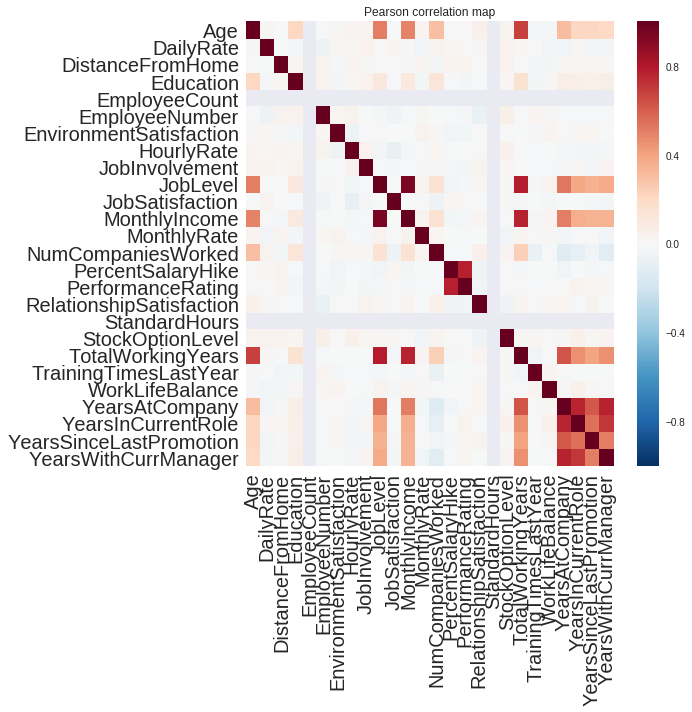

In [6]:
#sns.boxplot(data=data.YearsAtCompany)
#sns.distplot(data.MonthlyIncome)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)
corr_data = data.select_dtypes(["number"]).corr()
sns.heatmap(corr_data, ax=ax)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_title("Pearson correlation map")
plt.tight_layout()
plt.show()

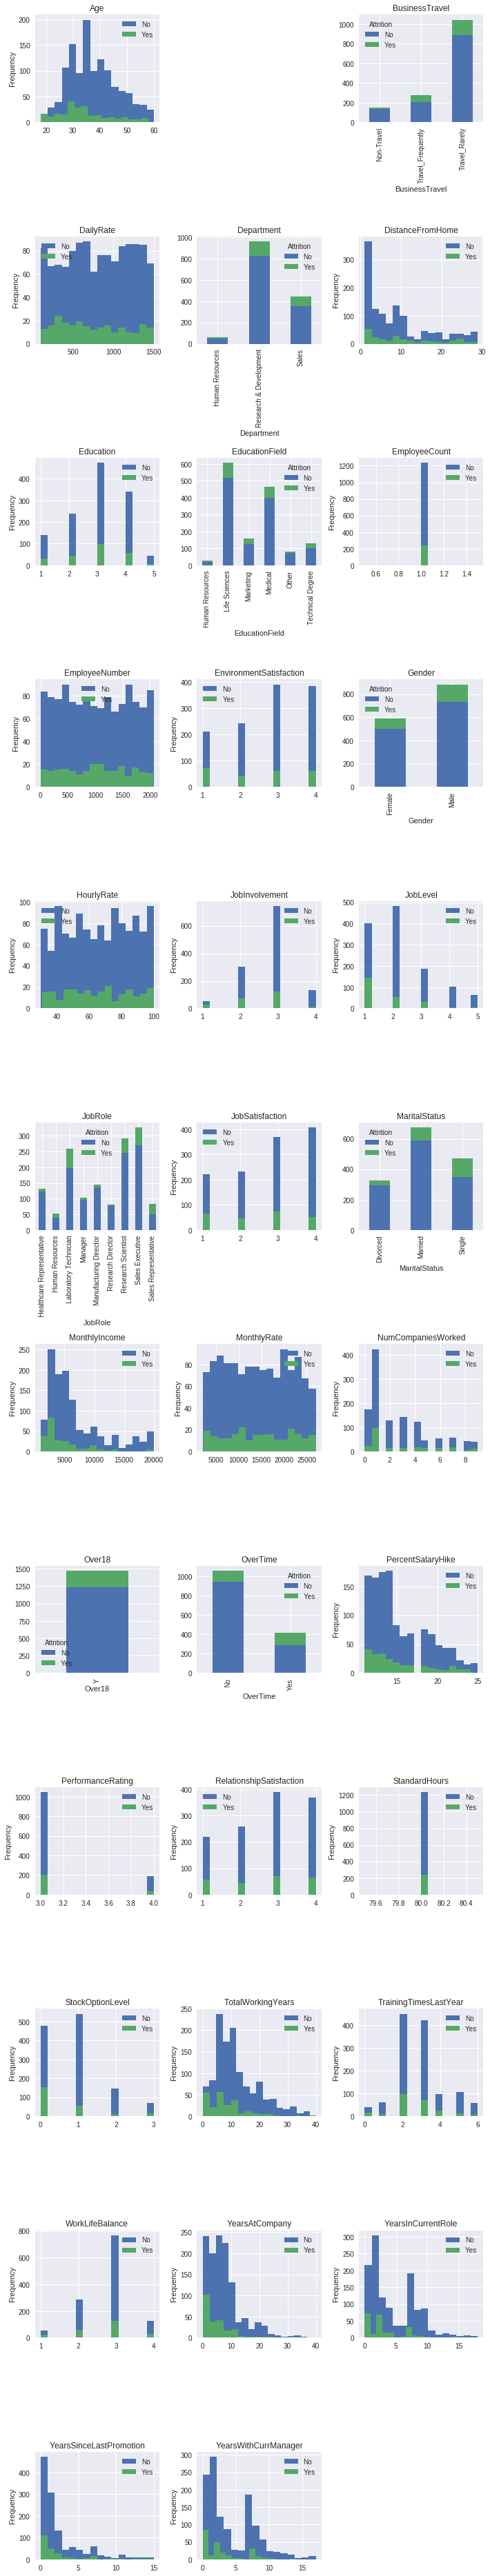

In [7]:
fig = plt.figure(figsize=(10, 52))
cols = 3
target_column = "Attrition"
rows = np.ceil(float(data.shape[1] / cols))
for i, column in enumerate(data.columns):
    if target_column == column:
        continue
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(column)
    if data.dtypes[column] == np.object:
        cts = data[[target_column, column]]
        cts = cts.groupby([target_column, column]).size()
        cts.unstack().T.plot(kind="bar", ax=ax, stacked=True, alpha=1)
    else:
        cts = data[[target_column, column]]
        #(xmin, xmax) = (min(cts[column].tolist()), max(cts[column].tolist()))
        cts.groupby(target_column)[column].plot(
            bins=16,
            kind="hist",
            stacked=True,
            alpha=1,
            legend=True,
            ax=ax,
            #range=[xmin, max]
        )
plt.tight_layout()

In [8]:
target_label = "Attrition"

def plot_num(label, data, ax, bins=16):
    d = data[[label, target_label]].sort_values(label).reset_index(drop=True)
    t = np.linspace(data[[label]].min()[label], data[[label]].max()[label], bins)
    
    m = pd.DataFrame({"BINS":np.round((d[[label]].values >= t) * t, 2).max(axis=1)})
    p = pd.concat([d, m], axis=1).groupby(["BINS", target_label]).count().unstack().fillna(0)

    b = p[label]["Yes"] / p[label]["No"]
    ax.bar(b.index, b, width=(t[1] - t[0]) *0.8)
    ax.set_title(label)
    ax.set_ylabel("YES / NO")
    return ax

def plot_cat(label, data, ax, bins=16):
    t = data[[label, target_label]]
    c = pd.DataFrame({"Count":np.ones(len(t), dtype=np.bool)})
    t = pd.concat([t, c], axis=1)
    b = t.groupby([label, target_label]).count().unstack()
    r = b["Count"]["Yes"] / b["Count"]["No"]
    ax.bar(np.arange(len(r)), r, tick_label=r.index)
    ax.set_ylabel("YES / NO")
    ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation="vertical")
    ax.set_title(label)
    return ax

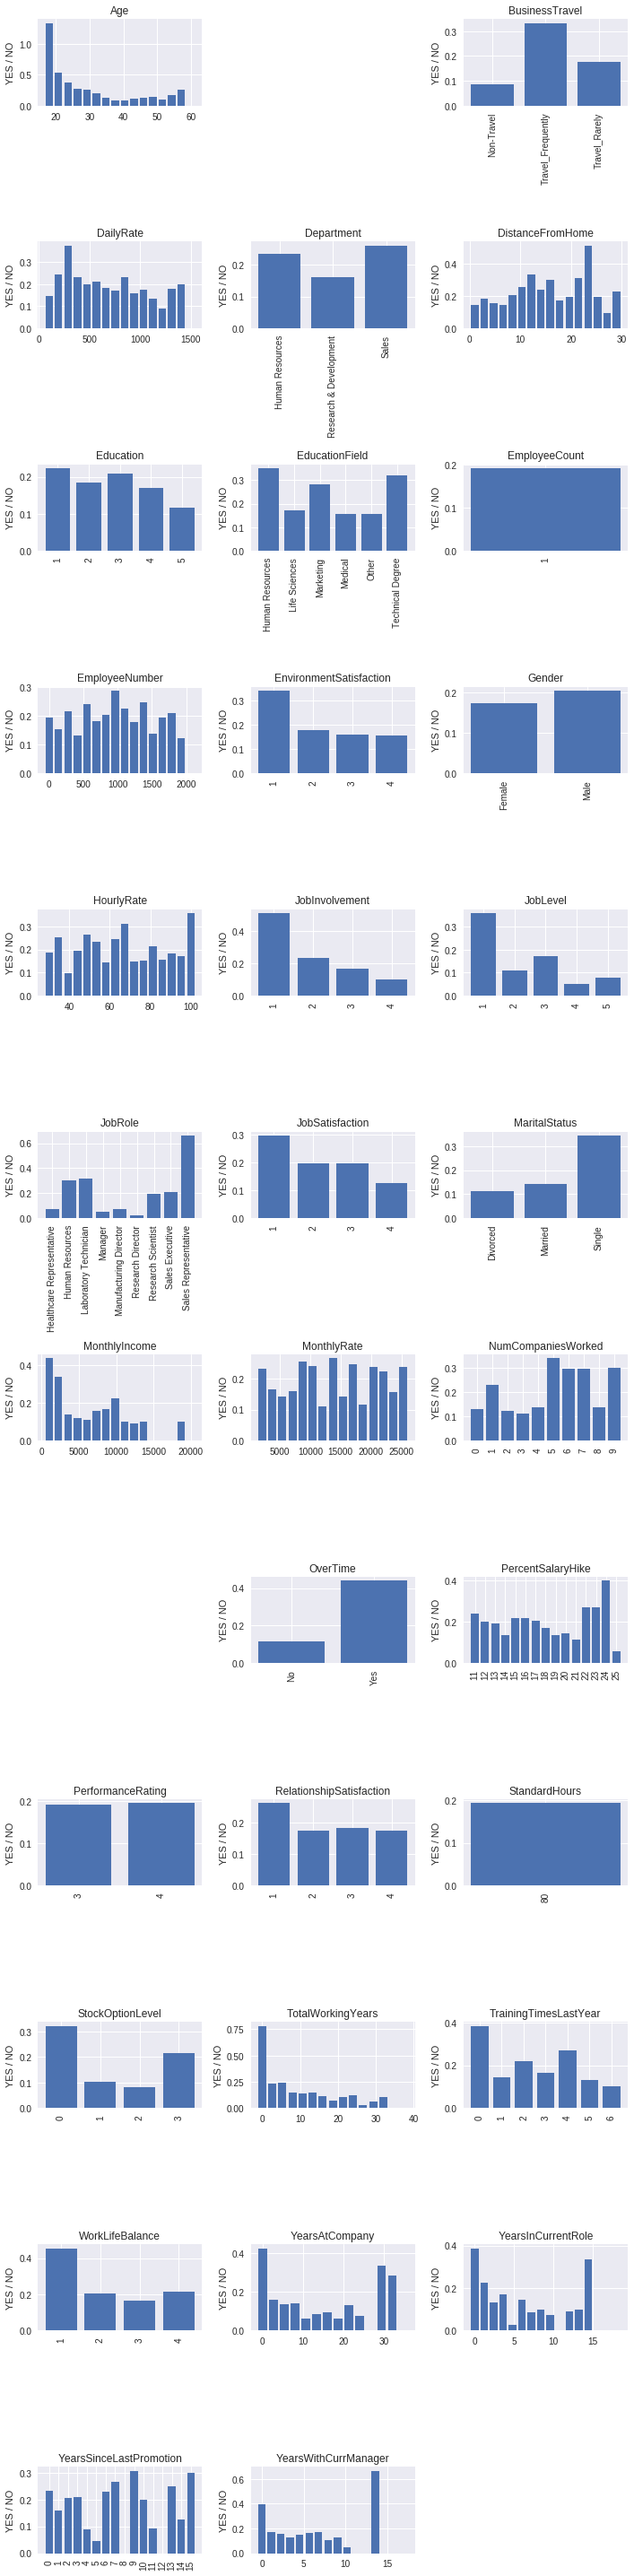

In [9]:
fig = plt.figure(figsize=(10, 40))

cols = 3
target_column = "Attrition"
rows = np.ceil(float(data.shape[1] / cols))
for i, column in enumerate(data.columns):
    if target_column == column or column=="Over18":
        continue
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(column)
    plot_func = None
    if data.dtypes[column] == np.object or  len(np.unique(data[column])) <= 16:
        plot_func = plot_cat
    else:
        plot_func = plot_num
    ax = plot_func(column, data, ax)
        
plt.tight_layout()
plt.show()
fig.autofmt_xdate()

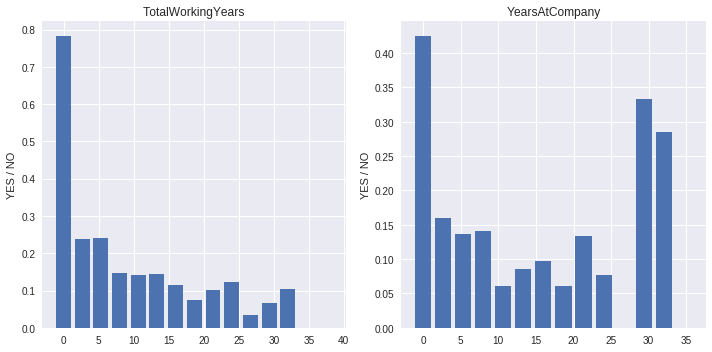

In [10]:
fig = plt.figure(2, figsize=(10, 5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1 = plot_num("TotalWorkingYears", data, ax1, 16)
ax2 = plot_num("YearsAtCompany", data, ax2)
plt.tight_layout()
#plt.savefig("YearsAtCompanyVSYearsInCurrentRole.png")

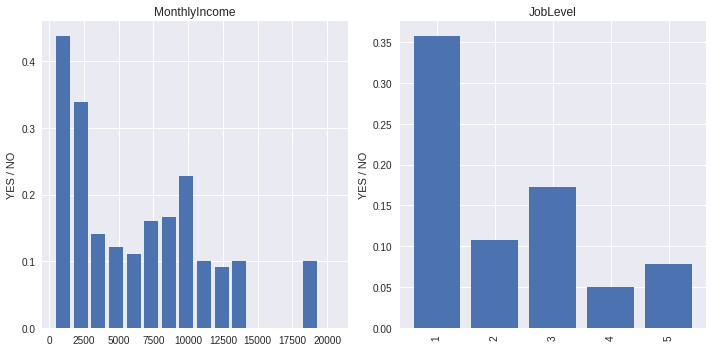

In [11]:
fig = plt.figure(2, figsize=(10, 5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1 = plot_num("MonthlyIncome", data, ax1, 16)
ax2 = plot_cat("JobLevel", data, ax2)
plt.tight_layout()
#plt.savefig("MonthlyIncomeVSJobLevel.png")

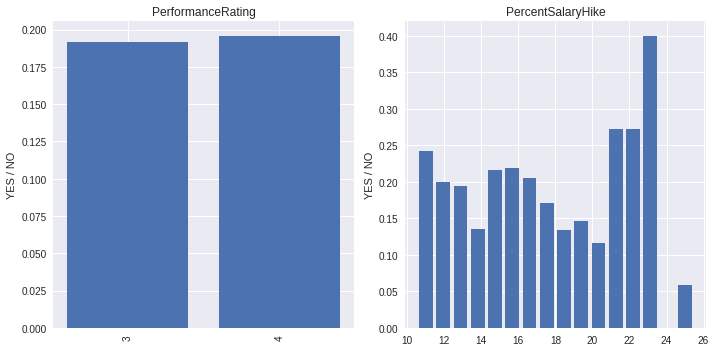

In [12]:
fig = plt.figure(2, figsize=(10, 5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1 = plot_cat("PerformanceRating", data, ax1, 16)
ax2 = plot_num("PercentSalaryHike", data, ax2, 16)
#ax1.set_title("MonthlyIncome vs TotalWorkingYears")
#ax1.set_xlabel("PercentSalaryHike")
#ax1.set_ylabel("PerformanceRating")
#ax1.scatter(data["PercentSalaryHike"], data["PerformanceRating"])
plt.tight_layout()
#plt.savefig("PerformanceRatingVSPercentSalaryHike.png")

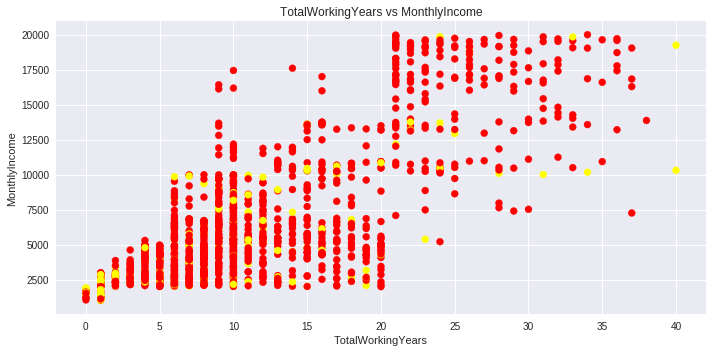

In [13]:
fig = plt.figure(2, figsize=(10, 5))
ax = fig.add_subplot(1,1,1)
ax.set_title("TotalWorkingYears vs MonthlyIncome")
ax.set_xlabel("TotalWorkingYears")
ax.set_ylabel("MonthlyIncome")
ax.scatter(data["TotalWorkingYears"], data["MonthlyIncome"], c=data[["Attrition"]].eq(["Yes"]).mul(1), cmap=plt.cm.autumn)
#ax1 = fig.add_subplot(1,2,1)
#ax2 = fig.add_subplot(1,2,2)
#ax1 = plot_num("TotalWorkingYears", data, ax1, 16)
#ax2 = plot_num("MonthlyIncome", data, ax2)
plt.tight_layout()
#plt.savefig("TotalWorkingYearsVSMonthlyIncome.png")

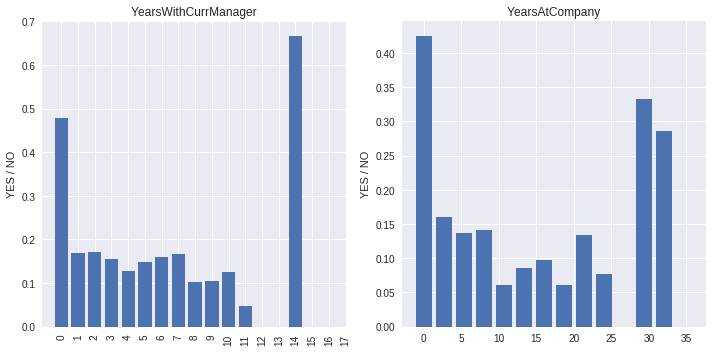

In [14]:

fig = plt.figure(2, figsize=(10, 5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1 = plot_cat("YearsWithCurrManager", data, ax1, 16)
ax2 = plot_num("YearsAtCompany", data, ax2)
plt.tight_layout()
#plt.savefig("YearsWithCurrManagerVYearsAtCompany.png")

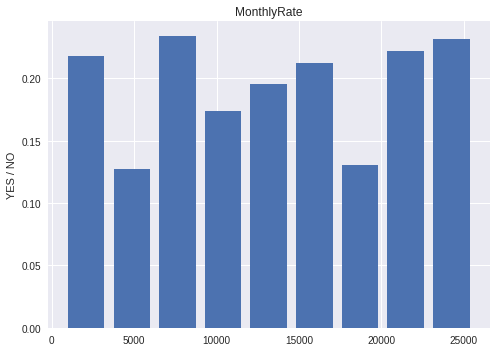

In [15]:
fig = plt.figure(2, figsize=(7, 5))
ax1 = fig.add_subplot(1,1,1)
ax1 = plot_num("MonthlyRate", data, ax1, 10)
plt.tight_layout()
#plt.savefig("MonthlyRate.png")

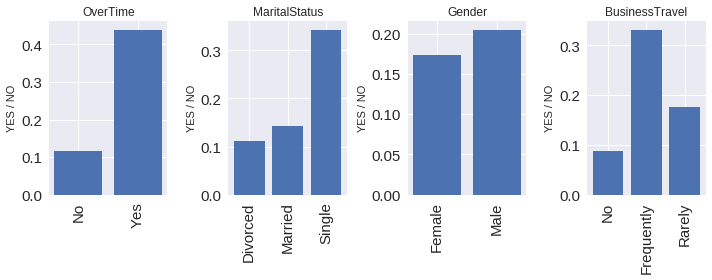

In [16]:
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 4, 1)
ax1 = plot_cat("OverTime", data, ax1)
ax2 = fig.add_subplot(1, 4, 2)
ax2 = plot_cat("MaritalStatus", data, ax2)
ax3 = fig.add_subplot(1, 4, 3)
ax3 = plot_cat("Gender", data, ax3)
ax4 = fig.add_subplot(1, 4, 4)
ax4 = plot_cat("BusinessTravel", data, ax4)
ax4.set_xticklabels(["No", "Frequently", "Rarely"])

ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax3.tick_params(axis='both', which='major', labelsize=15)
ax4.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
#plt.savefig("Categorial.png")

## Data cleaning

As we can see our data has a numeric and categorical data. So we find a column that does not carry useful information, such as those that have the same value for each row. For this, we define the number of unique values for each column.

In [17]:
uniq = data.apply(lambda x: len(np.unique(np.array(x))))
uniq

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Then we find the column that has only one values for all rows and we delete them.

In [18]:
no_inf = uniq.index[uniq==1]
print(no_inf)
data.drop(labels=no_inf, axis=1, inplace=True)

Index(['EmployeeCount', 'Over18', 'StandardHours'], dtype='object')


In [19]:
unuseful_label = ["DailyRate", "EmployeeNumber", "HourlyRate", "MonthlyRate", "PercentSalaryHike", 
                  "PerformanceRating", "TrainingTimesLastYear" , "YearsSinceLastPromotion", "Gender"]
data.drop(unuseful_label, axis=1, inplace=True)

Then we find all the categorical attributes that have only two unique values and encode them as **0** or **1**

In [20]:
two_val = uniq.index[(uniq==2) & (data.dtypes == "object")]
print(two_val)

data[two_val] = data[two_val].eq(["Yes", "Yes"]).mul(1)
data[two_val].head()

Index(['Attrition', 'OverTime'], dtype='object')


,Attrition,OverTime
0,1,1
1,0,0
2,1,1
3,0,1
4,0,0


Changing numerical features to one-hot encoded

In [21]:
numerical_val = data.columns[data.dtypes != "object"]
data = pd.get_dummies(data, columns=data.columns.drop(numerical_val))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 42 columns):
Age                                  1470 non-null int64
Attrition                            1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
JobInvolvement                       1470 non-null int64
JobLevel                             1470 non-null int64
JobSatisfaction                      1470 non-null int64
MonthlyIncome                        1470 non-null int64
NumCompaniesWorked                   1470 non-null int64
OverTime                             1470 non-null int64
RelationshipSatisfaction             1470 non-null int64
StockOptionLevel                     1470 non-null int64
TotalWorkingYears                    1470 non-null int64
WorkLifeBalance                      1470 non-null int64
YearsAtCompany                       1

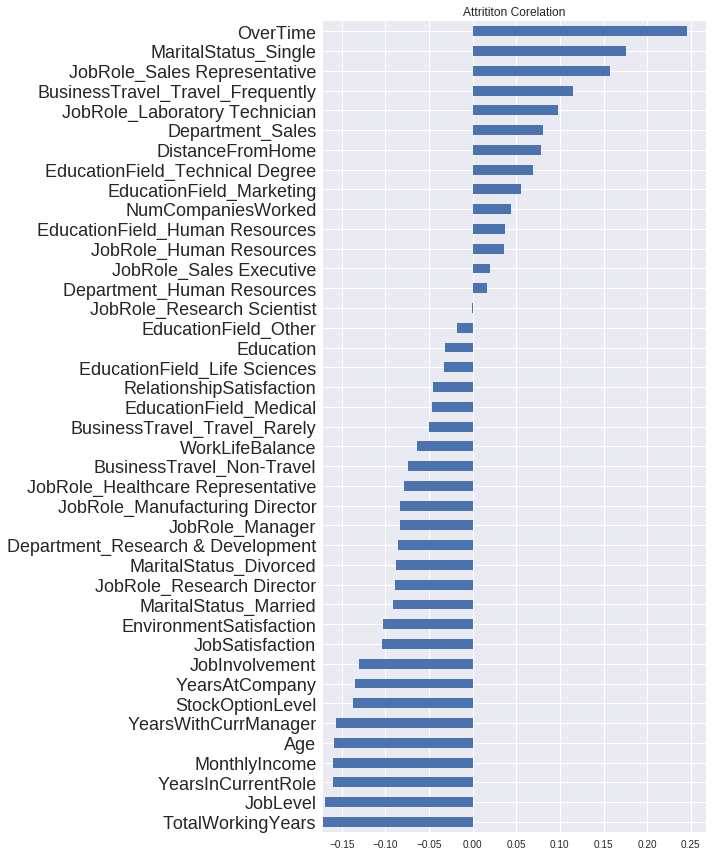

In [22]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)
ax = data.corr().ix["Attrition"].drop("Attrition").sort_values().plot(kind="barh", figsize=(10, 12), ax=ax)
ax.tick_params(axis='y', which='major', labelsize=18)
ax.set_title("Attrititon Corelation")
plt.tight_layout()
#plt.savefig("AttritionCorelation.png")

## Building and Learning Model
To simplify the construction of the model, we will continue to operate on the Numpy arrays, and also convert the integer value to a floating-point value, to prevent unnecessary warnings

In [23]:
Y = data[["Attrition"]].values.ravel()
X = data.drop("Attrition", axis=1).values.astype("float64")

To prevent problems with convergence, we normalize all our data.

In [24]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

We divide our sample into test and training in relation **1/4**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

We denote the function for finding parameters for the concise classifier. To select the classifier, a ** `roc auc` ** metric was chosen, such as that which is well suited for unbalanced binary samples. Also for a visual understanding of the result, I build a counfusion matrix , showing the number of correctly and incorrectly classified objects.

In [26]:
def plot_confusion_matrix(y_test, y_pred, iters=500):
        fig = plt.figure(figsize=(7, 7))
        ax = sns.heatmap(confusion_matrix(y_test, y_pred), 
                         annot=True, 
                         cbar=False, 
                         linewidths=2, 
                         linecolor="k",
                         annot_kws={"size": 30},
                         fmt="")
        ax.tick_params(axis='y', which='major', labelsize=18)
        ax.set_title("Confusion matrix", fontdict={"size": 18})
        ax.set_ylabel("True label", fontdict={"size": 18})
        ax.set_xlabel("Predicted label")
        fig.tight_layout()
        return ax
    
def plot_learning_curve(train_sizes, train_scores, test_scores):
    fig = plt.figure(dpi=100)
    train_scores_mean = train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    test_scores_mean = test_scores.mean(axis=1)
    test_scores_std = test_scores.std(axis=1)
    #fig.grid()
    ax1 = fig.add_subplot(1,1,1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    ax1.legend(loc="best")
    fig.tight_layout()
    return ax1

def search_parameter(clf, params, X, y, cv=5, iters=500):
    
    model = RandomizedSearchCV(clf(), param_distributions=params, 
                               n_iter=iters, cv=cv, n_jobs=-1, scoring="f1", 
                               error_score=0, verbose=1)
    model.fit(X, y)
    return model

### SGDClassifier
Demonstration of parameters for which a search was conducted for a stochastic gradient classifier

    params = {"loss": ["hinge", "log", "squared_hinge", "perceptron"],
              "penalty": ["elasticnet"],
              "l1_ratio": np.linspace(0, 1, 20),
              "n_iter": [900],
              "alpha": 10.0**np.arange(-5, 2),
              "class_weight": ["balanced", None],
              "random_state": [0]}
    sgd_result = search_parameter(SGDClassifier, params, X_train, y_train, iters=500)

Final model

Accuracy for train dataset: 0.8892921960072595
Accuracy for test dataset: 0.8858695652173914
F1: 0.5714285714285714
AUC ROC: 0.7220244716351503


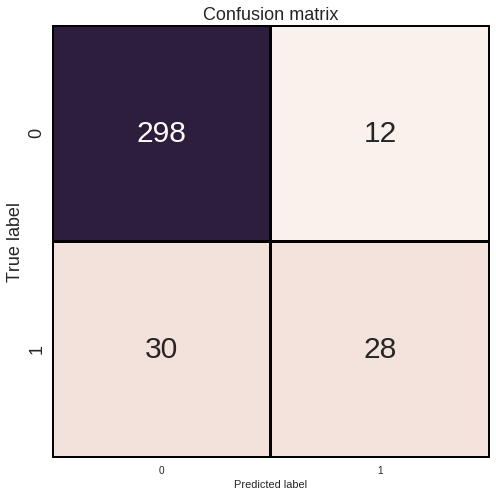

In [27]:
sgd_params = {'alpha': 0.0001,
              'class_weight': None,
              'l1_ratio': 1,
              'loss': 'log',
              'n_iter': 908,
              'penalty': 'elasticnet',
              'random_state': 1, 
              'shuffle': True}
clf = SGDClassifier(**sgd_params)
clf.fit(X_train, y_train)

print("Accuracy for train dataset: {}".format(clf.score(X_train, y_train)))
print("Accuracy for test dataset: {}".format(clf.score(X_test, y_test)))
print("F1: {}".format(f1_score(y_test, clf.predict(X_test))))
print("AUC ROC: {}".format(roc_auc_score(y_test, clf.predict(X_test))))
plot_confusion_matrix(y_test, clf.predict(X_test))
##plt.savefig("ConfusionSGD.png")

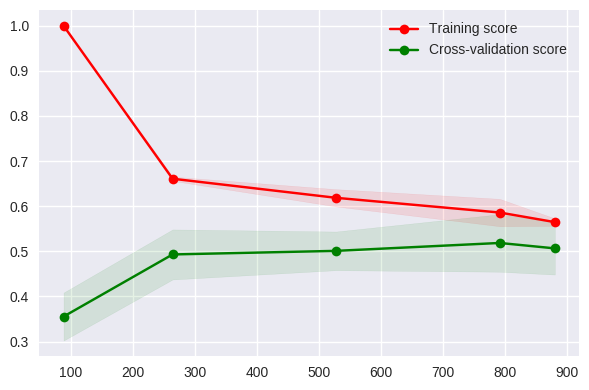

In [28]:
train_sizes, train_scores, valid_score = learning_curve(SGDClassifier(**sgd_params), X_train, y_train, train_sizes=[0.1, 0.3, 0.6, 0.9, 1], cv=5, scoring="f1")
plot_learning_curve(train_sizes, train_scores, valid_score)
#plt.savefig("LearningCurveSGD.png")

### SVM

Accuracy for train dataset: 0.8911070780399274
Accuracy for test dataset: 0.8858695652173914
F1: 0.5434782608695653
AUC ROC: 0.7010011123470522


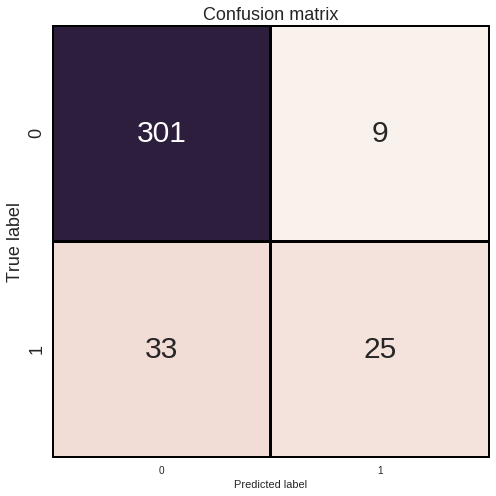

In [29]:
param = {
    "C":1,
    "kernel":"linear",
    "gamma":1,
    "random_state":0,
}
#param = svc_result.best_params_

clf = SVC(**param)
clf.fit(X_train, y_train)

print("Accuracy for train dataset: {}".format(clf.score(X_train, y_train)))
print("Accuracy for test dataset: {}".format(clf.score(X_test, y_test)))
print("F1: {}".format(f1_score(y_test, clf.predict(X_test))))
print("AUC ROC: {}".format(roc_auc_score(y_test, clf.predict(X_test))))
plot_confusion_matrix(y_test, clf.predict(X_test))
#plt.savefig("ConfusionSVM.png")

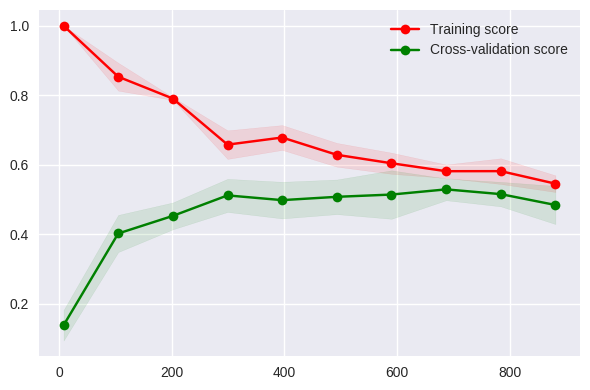

In [30]:
train_sizes, train_scores, valid_score = learning_curve(clf, X_train, y_train, train_sizes=np.linspace(0.01,1,10), cv=5, scoring="f1")
plot_learning_curve(train_sizes, train_scores, valid_score)
#plt.savefig("LerningCUrveSVM.png")